  + https://datascienceplus.com/fitting-neural-network-in-r/

In [11]:
# cd /home/larisa/Dropbox/Apps
# /home/larisa/anaconda3/bin/jupyter notebook
# install.packages('tictoc', dependencies=TRUE)
require(neuralnet); require(tictoc); require(plyr)
rm(list=ls())
#filled_path <- "C:/Users/IVA/Dropbox/Apps/R/"
filled_path <- "/home/larisa/Dropbox/Apps/"
setwd(filled_path); getwd()
cli_dataset <-read.table("1967.cli", header=FALSE, sep="")
names(cli_dataset) <- c("day", "month", "year", "prec", "temp");
cli_dataset[cli_dataset$prec == -9999, 4] <- NA ; prec_vector <- cli_dataset[, 4]; 
#cli_dataset[cli_dataset$temp == -9999, 5] <- NA ; prec_vector <- cli_dataset[, 5]; 
days_vector<- c((1: length(prec_vector))); print(summary(prec_vector))
length(days_vector) == length(prec_vector)
DIV_2 <- F # Убирать ли выбросы в данных

[1] "/home/larisa/Dropbox/Apps"

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
  0.000000   0.000000   0.000000   9.725904   5.000000 191.000000         33 


[1] TRUE

In [12]:
prec_div2 <- function(x, sh=80){
  if(x > 100) return(x-sh)
  else if(x > 170) return(x-sh-sh) 
  else return(x)
}
abs_predict <- function(x){
  if(x < 0) return(0)
  else return(x)
}

In [13]:
# Preparing to fit the neural network
data <- na.omit(data.frame(days = days_vector, prec = prec_vector))
if(DIV_2 == TRUE){
    prec_vector_div2 <- sapply(data[, 2], prec_div2)
    data <- data.frame(days = data[, 1], prec = prec_vector_div2)
} 
index <- sample(1: nrow(data), round(0.7 * nrow(data)))
summary(data)

      days               prec           
 Min.   :  1.0000   Min.   :  0.000000  
 1st Qu.:101.7500   1st Qu.:  0.000000  
 Median :192.5000   Median :  0.000000  
 Mean   :190.7349   Mean   :  9.725904  
 3rd Qu.:279.2500   3rd Qu.:  5.000000  
 Max.   :365.0000   Max.   :191.000000  

In [14]:
# I chose to use the min-max method and scale the data in the interval [0,1]
maxs <- apply(data, 2, max); mins <- apply(data, 2, min)
scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))
train_ <- scaled[index,]; test_ <- scaled[-index,]

In [15]:
tic()
nnet.prec <- neuralnet(prec~days, data=train_, hidden=c(4,7,4), linear.output=T)
toc()
#plot(nnet.prec)

2.693 sec elapsed


In [16]:
# Predicting perc using the neural network
comp.prec <- compute(nnet.prec, test_[, 1])
# Обратное действие - денормализация
max_ <- max(data$prec); min_ <- min(data$prec)
comp.prec_ <- comp.prec$net.result * (max_ - min_) + min_
test.r <- (test_$prec) * (max_ - min_) + min_

MSE.nn <- sum((test.r - comp.prec_)^2)/nrow(test_)
cat("MSE = ", MSE.nn, "\n")

MSE.nn_ <- sum((test_[, 2] - comp.prec$net.result)^2)/nrow(test_)
cat("MSE_ = ", MSE.nn_, "\n")

MSE =  457.0362495 
MSE_ =  0.01252806254 


#### The output plot
Real vs Predicted

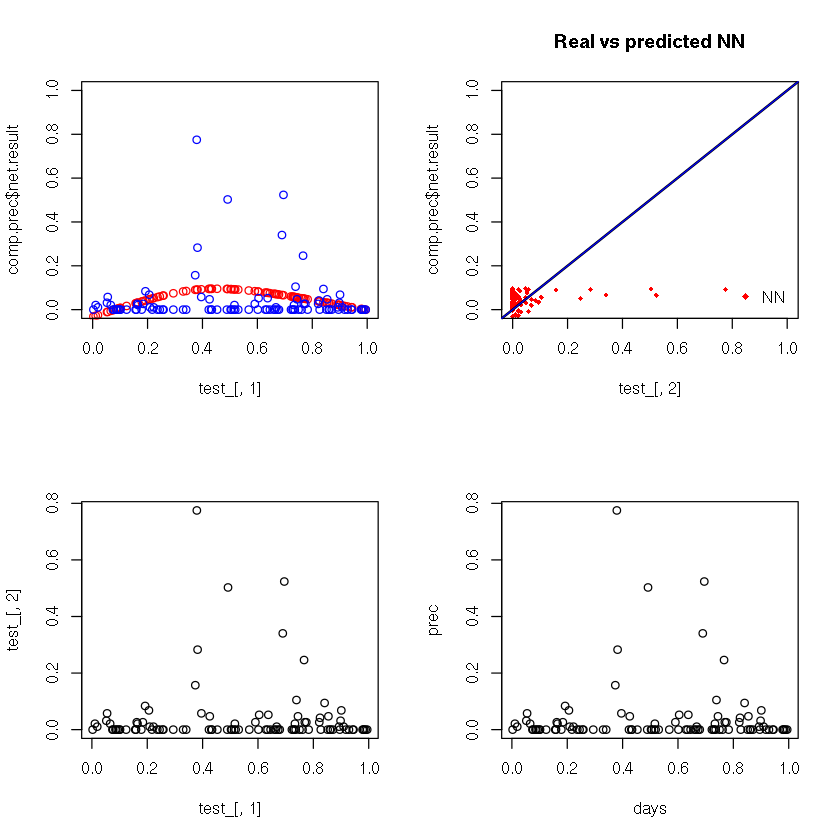

In [17]:
par(mfrow=c(2,2))

plot(test_[, 1], comp.prec$net.result, col="red", ylim=c(0,1), xlim=c(0,1))
points(test_, col="blue")

plot(test_[, 2], comp.prec$net.result, col='red', main='Real vs predicted NN', pch=18, cex=0.7, ylim=c(0,1), xlim=c(0,1))
abline(0,1,lwd=2)
abline(0,1, col="blue")
legend('bottomright',legend='NN',pch=18,col='red', bty='n')

plot(test_[,1], test_[,2]); plot(test_)


In [18]:
require(plyr)

In [19]:
# https://datascienceplus.com/parallel-vectorized-operations/